### **Q1. Explain the basic concept of clustering and give examples of applications where clustering is useful.**  
Clustering is an unsupervised learning technique that groups similar data points together based on certain characteristics. It helps in discovering hidden patterns in data.  

Examples of clustering applications:  
- **Customer Segmentation** – Group customers based on purchasing behavior.  
- **Image Segmentation** – Group similar pixels for object detection.  
- **Anomaly Detection** – Detect fraudulent transactions in banking.  
- **Genomics** – Cluster genes with similar expression patterns.  

---

### **Q2. What is DBSCAN and how does it differ from other clustering algorithms such as K-Means and Hierarchical Clustering?**  
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that groups high-density regions while marking low-density points as noise (outliers).  

Differences from K-Means:  
- DBSCAN does not require specifying the number of clusters, whereas K-Means does.  
- DBSCAN finds arbitrary-shaped clusters, while K-Means assumes spherical clusters.  
- DBSCAN handles outliers naturally, whereas K-Means is sensitive to them.  

Differences from Hierarchical Clustering:  
- DBSCAN does not build a hierarchy, while hierarchical clustering does.  
- DBSCAN is more efficient for large datasets.  

---

### **Q3. How do you determine the optimal values for the epsilon and minimum points parameters in DBSCAN clustering?**  
Epsilon (\(\varepsilon\)) defines the radius of the neighborhood.  
MinPts is the minimum number of points required to form a dense region.  

Choosing \(\varepsilon\) and MinPts:  
- Use a **k-distance plot**: Sort distances of each point’s k-th nearest neighbor and find the "elbow point."  
- A typical MinPts value is twice the number of dimensions in the dataset.  

---

### **Q4. How does DBSCAN clustering handle outliers in a dataset?**  
Outliers are naturally handled by marking points that do not belong to any cluster as noise points.  
Points that do not have enough neighbors within \(\varepsilon\) remain unclustered.  

---

### **Q5. How does DBSCAN clustering differ from K-Means clustering?**  

| Feature | DBSCAN | K-Means |
|---------|--------|---------|
| Cluster Shape | Arbitrary | Spherical |
| Requires \( K \) | No | Yes |
| Handles Noise | Yes | No |
| Handles Varying Densities | Yes | No |
| Works for Large Datasets | No | Yes |

---

### **Q6. Can DBSCAN clustering be applied to datasets with high-dimensional feature spaces? If so, what are some potential challenges?**  
Yes, DBSCAN can be used for high-dimensional data, but with challenges:  
- **Curse of Dimensionality** – Distance metrics become less meaningful.  
- **Difficulty in choosing \(\varepsilon\)** – High-dimensional spaces require different distance thresholds.  

A common solution is to use **PCA or t-SNE** to reduce dimensions before applying DBSCAN.  

---

### **Q7. How does DBSCAN clustering handle clusters with varying densities?**  
DBSCAN can handle varying-density clusters because MinPts and \(\varepsilon\) define clusters based on local density rather than global structure.  
However, if densities differ too much, a single \(\varepsilon\) may not be optimal for all clusters.  

---

### **Q8. What are some common evaluation metrics used to assess the quality of DBSCAN clustering results?**  
Since DBSCAN does not produce a fixed number of clusters, the following metrics are commonly used:  
- **Silhouette Score** – Measures how well each point fits into its cluster.  
- **Davies-Bouldin Index** – Measures compactness and separation of clusters.  
- **Rand Index** – Measures clustering similarity with ground truth.  
- **Adjusted Mutual Information (AMI)** – Measures mutual information between clusters.  

---

### **Q9. Can DBSCAN clustering be used for semi-supervised learning tasks?**  
Yes, DBSCAN can help in semi-supervised learning:  
- **Label propagation** – Assigns cluster labels to unlabeled data.  
- **Noise detection** – Identifies mislabeled data points.  
- **Pretraining step** – Clusters can be used for pseudo-labeling in classification.  

---

### **Q10. How does DBSCAN clustering handle datasets with noise or missing values?**  
DBSCAN naturally handles noise by classifying low-density points as noise.  
For missing values:  
- Use **imputation techniques** such as mean/mode replacement or KNN imputation.  
- Use **distance measures** that handle missing values, such as Gower’s Distance.  

---

### **Q11. Implement the DBSCAN algorithm using Python and apply it to a sample dataset.**  

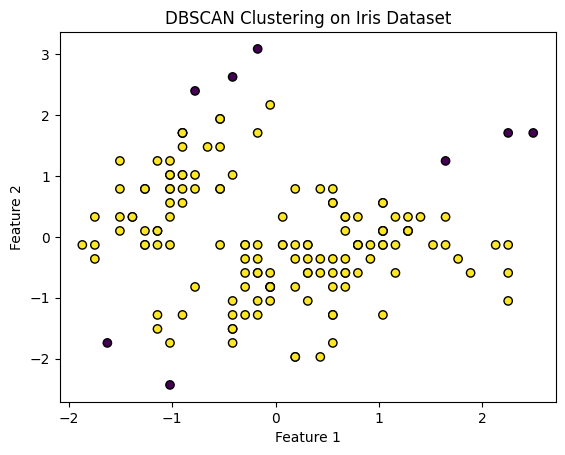

Number of clusters found: 1
Number of noise points detected: 8


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Load sample dataset (Iris)
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only two features for visualization

# Standardize features
X = StandardScaler().fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o', edgecolors='k')
plt.title("DBSCAN Clustering on Iris Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Print number of clusters and noise points
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)

print(f"Number of clusters found: {n_clusters}")
print(f"Number of noise points detected: {n_noise}")

### **Interpretation of the Results:**  
- Clusters are represented by different colors in the scatter plot.  
- Outliers are labeled as -1 (black points in the plot).  
- Number of clusters is determined automatically by DBSCAN.  
- Noise points (outliers) are identified and separated.  